Library

In [1]:
from sklearn.model_selection import StratifiedKFold

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from keras.models import load_model
from sklearn.metrics import ConfusionMatrixDisplay 
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [9]:
def base_model(): #conf2 loss: 0.2754 - accuracy: 0.8856 epochs=100, batch_size=128
    model = Sequential()
    model.add(Conv2D(128, (5,5), input_shape= (64, 64, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [3]:
def normResults(y_pred):
    yp = []
    for row in y_pred:
        valmax = max(row)
        for i in range(len(row)):
            if row[i] == valmax:
                row[i] = 1
            else:
                row[i] = 0
        
        yp.append(row)
    
    return yp

In [4]:
#Load data
#paths
root = 'E:/OneDrive - Universidad de Guanajuato/EF-Duque-Vazquez-Doctorado/'

#load data
data = np.load(root+"datasets/CellCycle-dataset-efdv/cellCycle.npy")
labels = np.load(root+"datasets/CellCycle-dataset-efdv/labels.npy")

In [5]:
#separación 

skfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Epoch 1/200
3227/3227 [==============================] - 457s 139ms/step - loss: 0.7469 - accuracy: 0.6847 - val_loss: 0.6356 - val_accuracy: 0.7323
Epoch 2/200
3227/3227 [==============================] - 436s 135ms/step - loss: 0.6208 - accuracy: 0.7408 - val_loss: 0.5961 - val_accuracy: 0.7491
Epoch 3/200
3227/3227 [==============================] - 439s 136ms/step - loss: 0.5959 - accuracy: 0.7505 - val_loss: 0.5710 - val_accuracy: 0.7595
Epoch 4/200
3227/3227 [==============================] - 440s 136ms/step - loss: 0.5802 - accuracy: 0.7567 - val_loss: 0.5597 - val_accuracy: 0.7652
Epoch 5/200
3227/3227 [==============================] - 441s 137ms/step - loss: 0.5690 - accuracy: 0.7614 - val_loss: 0.5518 - val_accuracy: 0.7671
Epoch 6/200
3227/3227 [==============================] - 439s 136ms/step - loss: 0.5563 - accuracy: 0.7661 - val_loss: 0.5441 - val_accuracy: 0.7705
Epoch 7/200
3227/3227 [==============================] - 438s 136ms/step - loss: 0.5501 - accuracy: 0.7686

e:\python\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


807/807 [==============================] - 23s 29ms/step


e:\python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


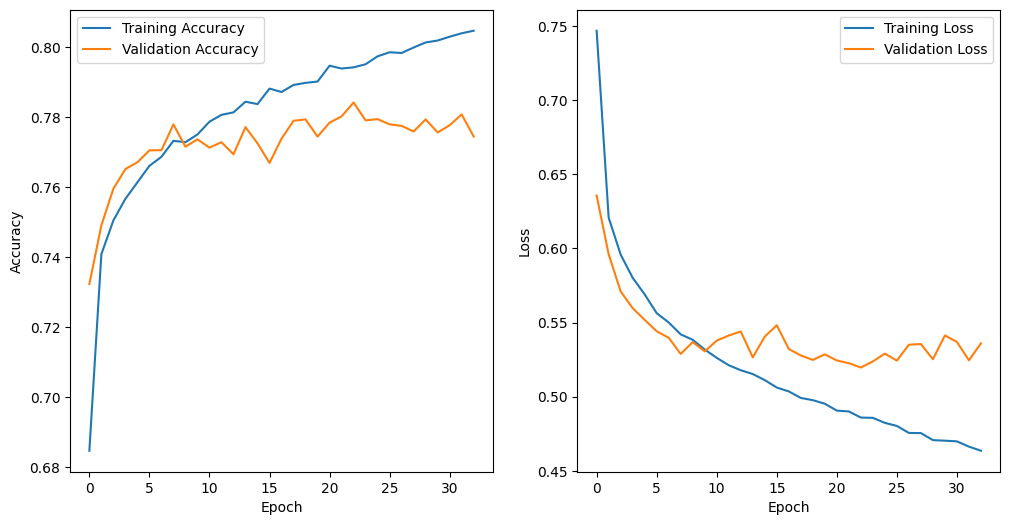

Epoch 1/200
3227/3227 [==============================] - 450s 138ms/step - loss: 0.7444 - accuracy: 0.6858 - val_loss: 0.6307 - val_accuracy: 0.7320
Epoch 2/200
3227/3227 [==============================] - 434s 134ms/step - loss: 0.6269 - accuracy: 0.7387 - val_loss: 0.5795 - val_accuracy: 0.7568
Epoch 3/200
3227/3227 [==============================] - 441s 137ms/step - loss: 0.5996 - accuracy: 0.7480 - val_loss: 0.5894 - val_accuracy: 0.7487
Epoch 4/200
3227/3227 [==============================] - 449s 139ms/step - loss: 0.5827 - accuracy: 0.7540 - val_loss: 0.5645 - val_accuracy: 0.7586
Epoch 5/200
3227/3227 [==============================] - 440s 136ms/step - loss: 0.5680 - accuracy: 0.7614 - val_loss: 0.5657 - val_accuracy: 0.7647
Epoch 6/200
3227/3227 [==============================] - 438s 136ms/step - loss: 0.5578 - accuracy: 0.7648 - val_loss: 0.5370 - val_accuracy: 0.7726
Epoch 7/200
3227/3227 [==============================] - 440s 136ms/step - loss: 0.5503 - accuracy: 0.7674

e:\python\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


807/807 [==============================] - 23s 29ms/step


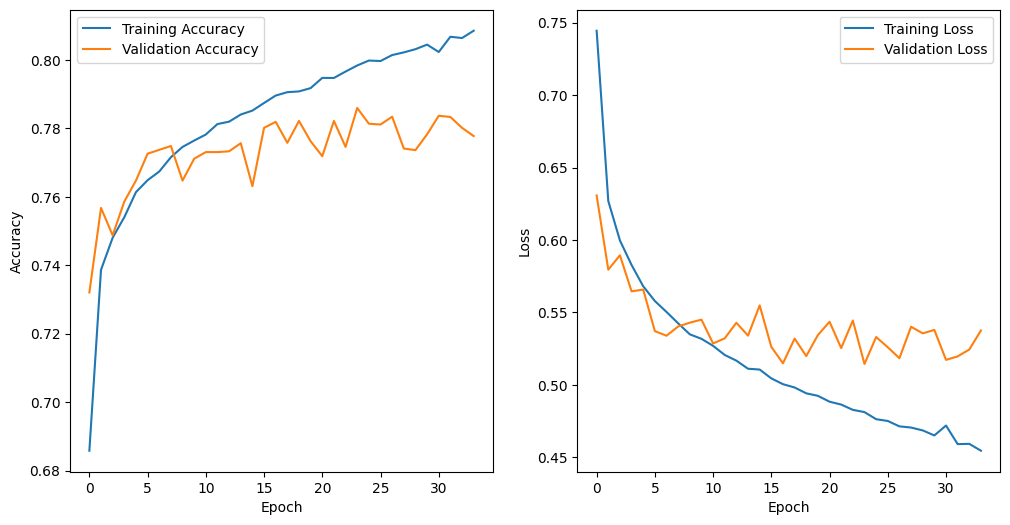

Epoch 1/200
3227/3227 [==============================] - 475s 140ms/step - loss: 0.7450 - accuracy: 0.6862 - val_loss: 0.6402 - val_accuracy: 0.7351
Epoch 2/200
3227/3227 [==============================] - 431s 134ms/step - loss: 0.6237 - accuracy: 0.7402 - val_loss: 0.6056 - val_accuracy: 0.7507
Epoch 3/200
3227/3227 [==============================] - 431s 134ms/step - loss: 0.5966 - accuracy: 0.7491 - val_loss: 0.5840 - val_accuracy: 0.7574
Epoch 4/200
3227/3227 [==============================] - 432s 134ms/step - loss: 0.5824 - accuracy: 0.7552 - val_loss: 0.5729 - val_accuracy: 0.7571
Epoch 5/200
3227/3227 [==============================] - 431s 134ms/step - loss: 0.5688 - accuracy: 0.7613 - val_loss: 0.5756 - val_accuracy: 0.7550
Epoch 6/200
3227/3227 [==============================] - 431s 134ms/step - loss: 0.5596 - accuracy: 0.7650 - val_loss: 0.5676 - val_accuracy: 0.7598
Epoch 7/200
3227/3227 [==============================] - 431s 133ms/step - loss: 0.5509 - accuracy: 0.7695

e:\python\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


807/807 [==============================] - 23s 28ms/step


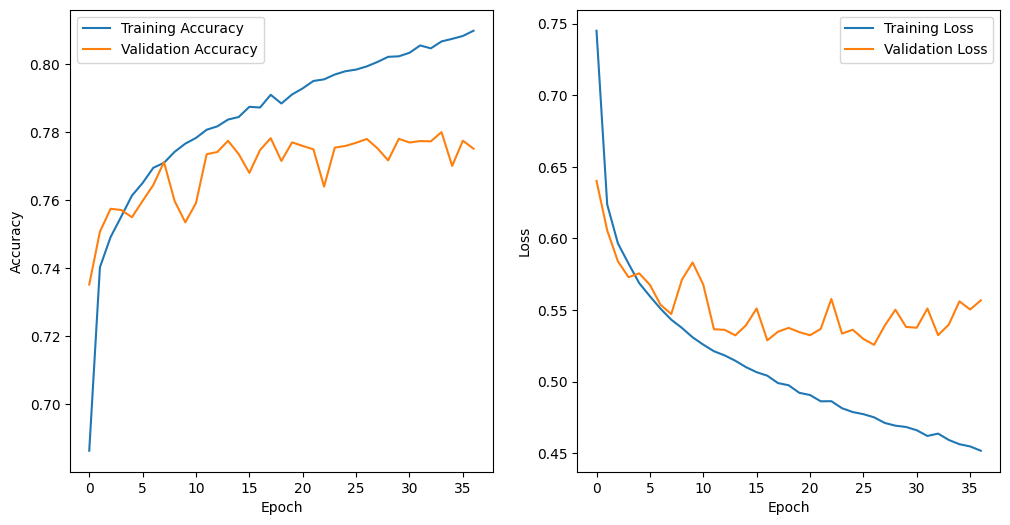

Epoch 1/200
3227/3227 [==============================] - 454s 140ms/step - loss: 0.7417 - accuracy: 0.6875 - val_loss: 0.6144 - val_accuracy: 0.7427
Epoch 2/200
3227/3227 [==============================] - 430s 133ms/step - loss: 0.6188 - accuracy: 0.7409 - val_loss: 0.5809 - val_accuracy: 0.7560
Epoch 3/200
3227/3227 [==============================] - 429s 133ms/step - loss: 0.5906 - accuracy: 0.7532 - val_loss: 0.5701 - val_accuracy: 0.7597
Epoch 4/200
3227/3227 [==============================] - 429s 133ms/step - loss: 0.5742 - accuracy: 0.7598 - val_loss: 0.5512 - val_accuracy: 0.7675
Epoch 5/200
3227/3227 [==============================] - 429s 133ms/step - loss: 0.5601 - accuracy: 0.7630 - val_loss: 0.5472 - val_accuracy: 0.7706
Epoch 6/200
3227/3227 [==============================] - 435s 135ms/step - loss: 0.5518 - accuracy: 0.7685 - val_loss: 0.5345 - val_accuracy: 0.7757
Epoch 7/200
3227/3227 [==============================] - 429s 133ms/step - loss: 0.5437 - accuracy: 0.7710

e:\python\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


807/807 [==============================] - 23s 28ms/step


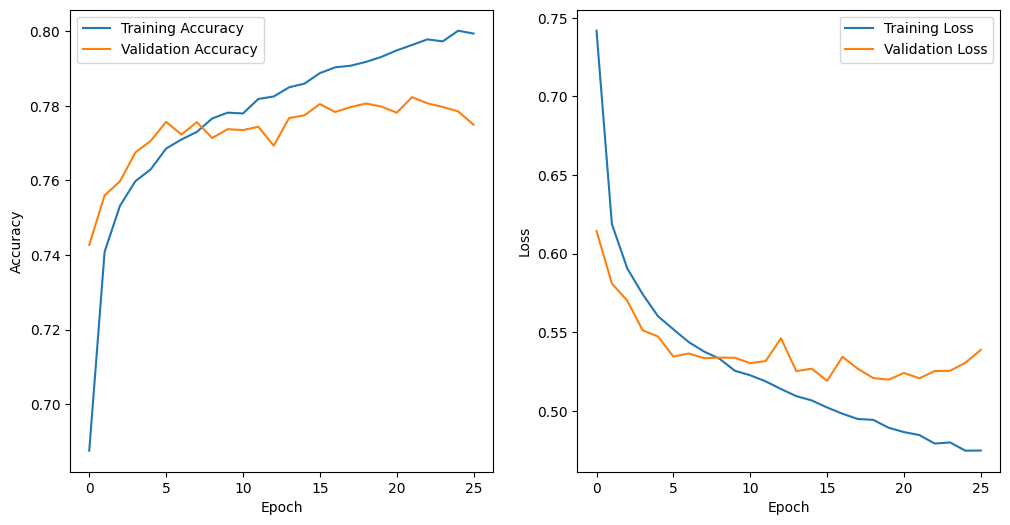

Epoch 1/200
3227/3227 [==============================] - 457s 140ms/step - loss: 0.7430 - accuracy: 0.6875 - val_loss: 0.6280 - val_accuracy: 0.7421
Epoch 2/200
3227/3227 [==============================] - 428s 133ms/step - loss: 0.6258 - accuracy: 0.7372 - val_loss: 0.6011 - val_accuracy: 0.7499
Epoch 3/200
3227/3227 [==============================] - 429s 133ms/step - loss: 0.6005 - accuracy: 0.7483 - val_loss: 0.5591 - val_accuracy: 0.7681
Epoch 4/200
3227/3227 [==============================] - 430s 133ms/step - loss: 0.5812 - accuracy: 0.7557 - val_loss: 0.5673 - val_accuracy: 0.7647
Epoch 5/200
3227/3227 [==============================] - 429s 133ms/step - loss: 0.5692 - accuracy: 0.7605 - val_loss: 0.5453 - val_accuracy: 0.7719
Epoch 6/200
3227/3227 [==============================] - 430s 133ms/step - loss: 0.5591 - accuracy: 0.7644 - val_loss: 0.5529 - val_accuracy: 0.7708
Epoch 7/200
3227/3227 [==============================] - 449s 139ms/step - loss: 0.5501 - accuracy: 0.7675

e:\python\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


807/807 [==============================] - 25s 30ms/step


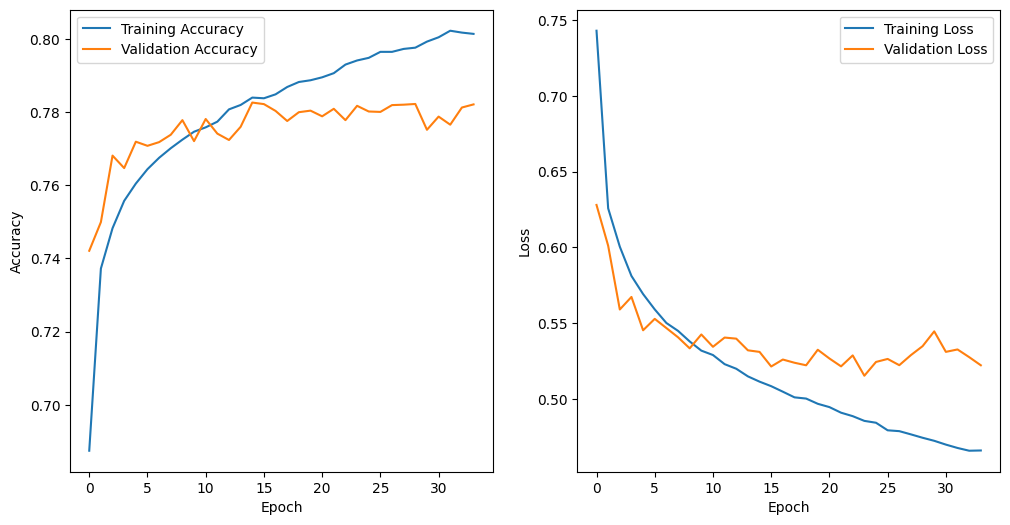

In [10]:
#modelo 

results = []
cont = 0
weighted_avg = []  
presicion  = []
recall = []
f1_list = []
accuracy = []
for train_index, test_index in skfolds.split(data, labels):
    
    X_train_folds = []
    y_train_folds = []
    X_test_folds  = []
    y_test_folds  = []
    
    
    #divide data
    X_train_folds = data[train_index]
    y_train_folds = labels[train_index]
    X_test_folds  = data[test_index]
    y_test_folds  = labels[test_index]
        
    
    y_train_folds = to_categorical(y_train_folds)
    y_test_folds = to_categorical(y_test_folds)
    
    """ train"""
        # define callback EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
        #fit model
    model = base_model()
    history = model.fit(X_train_folds, y_train_folds, validation_data = (X_test_folds, y_test_folds), epochs=200, batch_size=32, callbacks=[early_stopping])


    name_model = 'conf2_'+str(cont)
    model.save(root+'projects/cell_cycle/modelos/'+name_model+'.h5')
    #model = load_model(root+'projects/cell_cycle/modelos/'+name_model+'.h5')
        
    """predictions"""
    y_pred = model.predict(X_test_folds)
        
    yp = [] 
    yp = normResults(y_pred)
        
    n_correct = sum(yp == y_test_folds)
    results.append(n_correct/len(y_pred))
        
    yp2 = np.array(yp)
        
        
    for i in range(7):
        presicion.append(precision_score(y_test_folds[:,i],yp2[:,i]))
        recall.append(recall_score(y_test_folds[:,i],yp2[:,i]))
        f1 = f1_score(y_test_folds[:,i],yp2[:,i])
        f1_list.append(f1)
        
    weight = np.array(list(sum(y_test_folds == 1)))
    weighted_sum = np.sum(f1 * weight)
    total_weight = np.sum(weight)
    weighted_avg.append(weighted_sum / total_weight)
    

    #history
    train_accuracy = history.history['accuracy']
    train_loss = history.history['loss']
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
 
    cont += 1

In [19]:
f1_1 = f1_list[0:7]
print(f1_1)
print(weight)

m = f1_1 * weight
print(m)
ms = sum(m)
print(ms/sum(weight))


[0.8721566615358304, 0.6305115300833771, 0.8069727891156463, 0.37553342816500707, 0.0, 0.15384615384615385, 0.9047619047619048]
[11466  6893  6881   484    55    12    21]
[1.00001483e+04 4.34611598e+03 5.55277976e+03 1.81758179e+02
 0.00000000e+00 1.84615385e+00 1.90000000e+01]
0.7787714378202901
